In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('twin_properties.csv')

In [34]:
df.head()

,Twin ID,Property Key,URI Value,Lang,Lang Literal Value,String Literal Value,Numerical Values,Label
0,did:iotics:iotAzeYmevcMvSZoYiXUGqbRbJm1Z41TKCUe,http://data.iotics.com/public#hostAllowList,NaN,NaN,NaN,http://data.iotics.com/public#all,NaN,NaN
1,did:iotics:iotAzeYmevcMvSZoYiXUGqbRbJm1Z41TKCUe,http://data.iotics.com/public#hostMetadataAllo...,NaN,NaN,NaN,did:iotics:didexample1234absd,NaN,NaN
2,did:iotics:iotAzeYmevcMvSZoYiXUGqbRbJm1Z41TKCUe,http://data.iotics.com/public#hostMetadataAllo...,NaN,NaN,NaN,did:iotics:iotFmc6tRmH64DddY4dzPq827nywu6eSEAzM,NaN,NaN
3,did:iotics:iotAzeYmevcMvSZoYiXUGqbRbJm1Z41TKCUe,http://www.w3.org/2000/01/rdf-schema#label,NaN,en,SHIP,NaN,NaN,SHIP
4,did:iotics:iotAzeYmevcMvSZoYiXUGqbRbJm1Z41TKCUe,https://data.iotics.com/app#createdBy,NaN,NaN,NaN,msg,NaN,NaN


In [35]:
df.columns

Index(['Twin ID', 'Property Key', 'URI Value', 'Lang', 'Lang Literal Value',
       'String Literal Value', 'Numerical Values', 'Label'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Twin ID               12 non-null     object 
 1   Property Key          12 non-null     object 
 2   URI Value             0 non-null      float64
 3   Lang                  2 non-null      object 
 4   Lang Literal Value    2 non-null      object 
 5   String Literal Value  8 non-null      object 
 6   Numerical Values      2 non-null      float64
 7   Label                 2 non-null      object 
dtypes: float64(2), object(6)
memory usage: 900.0+ bytes


In [37]:
df.fillna("None",inplace=True)

/var/folders/by/jh1r5nkd5jng9qz7qxb0mjm80000gp/T/ipykernel_32989/2303779330.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("None",inplace=True)


In [38]:
df[df['Numerical Values']!="None"]

,Twin ID,Property Key,URI Value,Lang,Lang Literal Value,String Literal Value,Numerical Values,Label
5,did:iotics:iotAzeYmevcMvSZoYiXUGqbRbJm1Z41TKCUe,https://www.w3.org/2001/XMLSchema#decimal,None,None,None,None,100.0,None
11,did:iotics:iotJjAdHi2WQHorLWBzk3PAioQ2TZTLAeBQf,https://www.w3.org/2001/XMLSchema#decimal,None,None,None,None,100.0,None


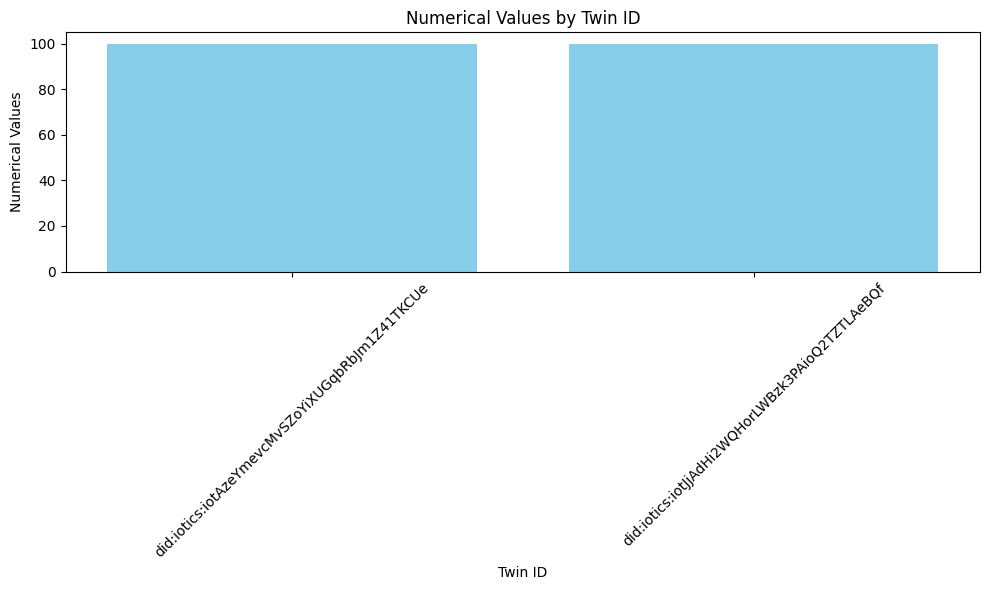

In [40]:
# Convert 'Numerical Values' column to numeric type
df['Numerical Values'] = pd.to_numeric(df['Numerical Values'], errors='coerce')

# Drop rows with NaN values in the 'Numerical Values' column
df = df.dropna(subset=['Numerical Values'])


# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Twin ID'], df['Numerical Values'], color='skyblue')
plt.xlabel('Twin ID')
plt.ylabel('Numerical Values')
plt.title('Numerical Values by Twin ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
df = pd.read_csv('twins_feeds_inputs.csv')
df

,Twin ID,Host ID,Feed ID,Input ID
0,did:iotics:iotAzeYmevcMvSZoYiXUGqbRbJm1Z41TKCUe,did:iotics:iotF4bijjsnZJNaEYZJFXKqiDWBjPEFPWddr,Fuel,NaN


In [27]:
import folium
df = pd.read_csv('twins_locations.csv')

m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=4)

# Add markers for each location in the DataFrame
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        #tooltip="Click me!",
        #popup=f"Latitude: {row['lat']}, Longitude: {row['lon']}",
        icon=folium.Icon(color="green")
    ).add_to(m)

# Display the map
m